CASE -

There is a Grocessary Store company, they have several stores around the world & they want us to build a predictive system for sales they can expect.

Application of our prediction for company -

- Predict sales revenue
- Aid future marketting plans
- Perceive challenges early
- Motivate sales team
- Plan recruitment strategy

This is a Regression based 'Supervised Machine Learning' Problem - In Supervised Learning we trained our model with labelled dataset & we have a target column for prediction.

Types of Supervised Learning -

- Classification

Classification is about predicting a class or disrete values. EX. Male/Female, True/False

- Regression

Regression is about predicting a quantity or contineous values. EX. Salary, Age, Price

WORK FLOW - 

BigMart Sales Data

Data Pre Processing

Data Analysis

Train Test Split

XGBoost Regressor

Model Evaluation

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Data Collection & Analysis

In [2]:
# Importing the data

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\BigMart Sales Prediction Using XGBoost Regressor\BigMart.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Checking number of data point(rows) & number of features(columns)

data.shape

(8523, 12)

In [4]:
# Getting some information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features - 
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size 
- Outlet_Location_Type 
- Outlet_Type

In [5]:
# Checking sum of missing values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values (Imputation) - 
- Mean --> Average Value (for numerical column)
- Mode --> Most Repeated Value (for categorical column)

Replacing missing values in 'Item_Weight' column

In [6]:
# Finding Mean value of 'Item_Weight' column as its a numerical column

data['Item_Weight'].mean()

12.857645184136183

In [7]:
# Filling missing value in 'Item_Weight' column with its mean value

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [8]:
# Checking sum of missing values for 'Item_Weight' column

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing missing values in 'Outlet_Size' column

In [9]:
# Finding mode of 'Outlet_Size' as its a categorical column

mode_of_outlet_size = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))

# We are taking 2 columns, 'Outlet_Size' & 'Outlet_Type' because these 2 columns are correlated, it will take missing value
#from 'Outlet_Size' & will compare it with 'Outlet_Type', then we are using aggfunc, inside it we are using lambda function as
#we are going to use it 1s, we are taking x, x represents 'Outlet_Size' & 'Outlet_Type' column & we are taking the mode for 
#'Outlet_Size' depending upon 'Outlet_Type', it will replace the missing value of 'Outlet_Size' depending upon the 'Outlet_Type'

In [10]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


From the above pivot table, we can observe that

- If the outlet type is Grocery Store in most of the cases the outlet size(mode) is Small
- If the outlet type is Supermarket Type1 in most of the cases the outlet size(mode) is Small
- If the outlet type is Supermarket Type2 in most of the cases the outlet size(mode) is Medium
- If the outlet type is Supermarket Type3 in most of the cases the outlet size(mode) is Medium

In [11]:
missing_values = data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


False represents it is not null that means the value is present

True represents a particular value is missing

In [12]:
# We are taking BigMart data, locating missing_values for 'Outlet_Size' column, in this column we are converting the missing
#values based on 'Outlet_Type' & applying lambda function, x represents 'Outlet_Size' & 'Outlet_Type' & we are taking
#mode_of_outlet_size 

data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [13]:
# Checking sum of missing values for 'Outlet_Size' column

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [14]:
# Statistical measures about data

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


DATA VISUALIZATION

- Data visualization is the graphical representation of information and data.
- It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns

Numerical Features Visualization

In [15]:
sns.set() # it will give us some themes for our plots

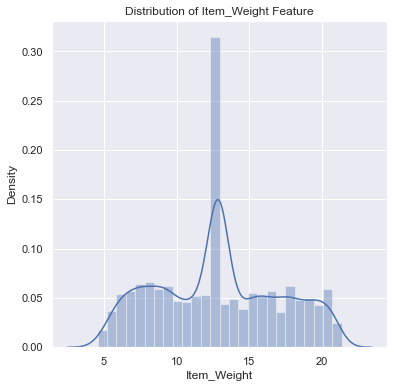

In [16]:
# Item_Weight column distribution

plt.figure(figsize = (6,6))
sns.distplot(data['Item_Weight'])
plt.title('Distribution of Item_Weight Feature')
plt.show()

- Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg
- Therefore in this 8523 products the average weight is about 12.8 Kg

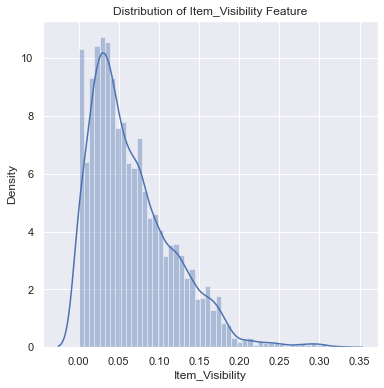

In [17]:
# Item_Visibility column distribution

plt.figure(figsize = (6,6))
sns.distplot(data['Item_Visibility'])
plt.title('Distribution of Item_Visibility Feature')
plt.show()

- Hence from the above graph we can observe that Item_Visibility feature is positively skewed

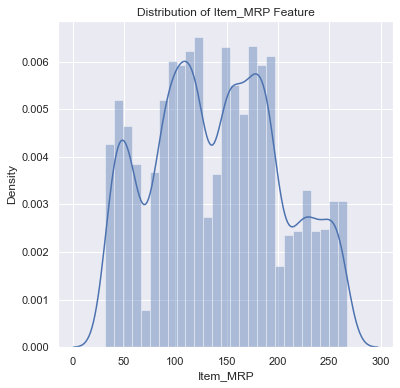

In [18]:
# Item_MRP column distribution

plt.figure(figsize = (6,6))
sns.distplot(data['Item_MRP'])
plt.title('Distribution of Item_MRP Feature')
plt.show()

- From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products
- Hence we have more products in the range of 100 MRP - 180 MRP

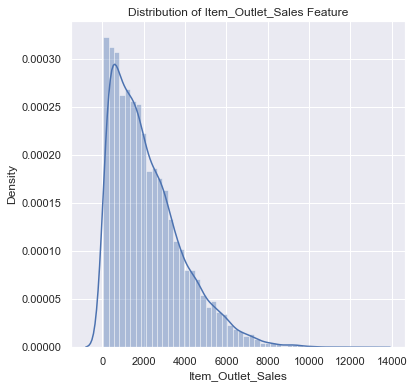

In [19]:
# Item_Outlet_Sales column distribution

plt.figure(figsize = (6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.title('Distribution of Item_Outlet_Sales Feature')
plt.show()

- Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed

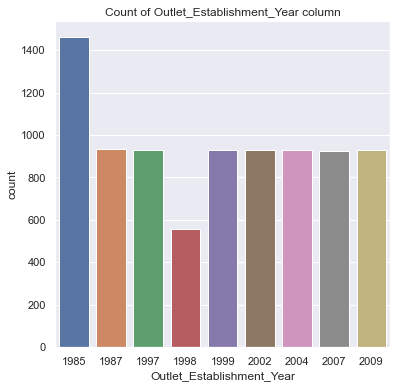

In [20]:
# Count of Outlet_Establishment_Year column

plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = data)
plt.title('Count of Outlet_Establishment_Year column')
plt.show()

- Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009
- Therefore these are the years on which different outlets or different stores have been established
- We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

Categorical Features Visualization

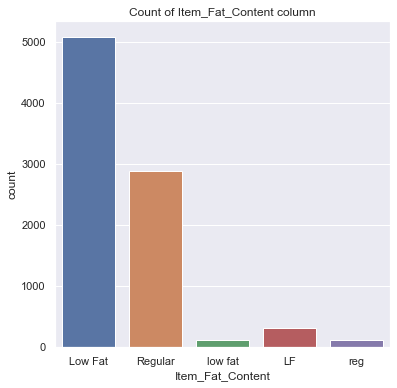

In [21]:
# Count of Item_Fat_Content column

plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = data)
plt.title('Count of Item_Fat_Content column')
plt.show()

- From the above graph we can observe that the data in the Item_Fat_Content column has to be cleaned since we have columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.Similarly we have Regular & reg where we need to put this into a single entity.
- Hence, we need to pre process this data so we will be dealing with this in a later point of time after the visualization of the data

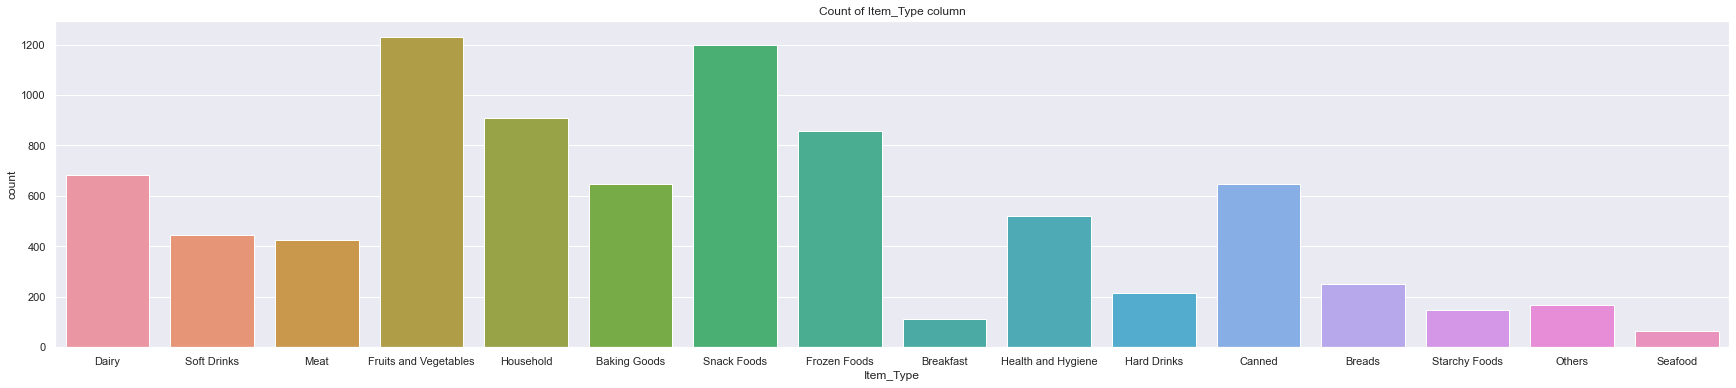

In [22]:
# Count of Item_Type column

plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type', data = data)
plt.title('Count of Item_Type column')
plt.show()

- From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc
- Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

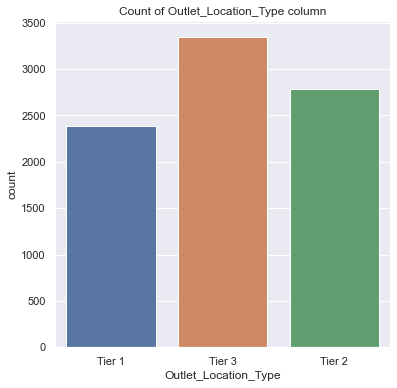

In [23]:
# Count of Outlet_Location_Type column

plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Location_Type', data = data)
plt.title('Count of Outlet_Location_Type column')
plt.show()

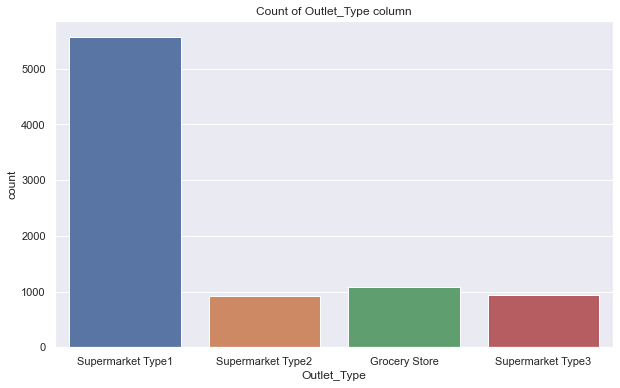

In [24]:
# Count of Outlet_Type column

plt.figure(figsize = (10,6))
sns.countplot(x = 'Outlet_Type', data = data)
plt.title('Count of Outlet_Type column')
plt.show()

Data Pre Processing

In [25]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
# Converting LF, reg, low fat values to Low Fat & Regular values

data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [28]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding
- Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
- In simple terms, taking all the categorical values & transforming them into some numerical values

In [29]:
encoder = LabelEncoder()

In [30]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'].astype(str))
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


- Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique
- Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.

Splitting Features & Target

In [32]:
x = data.drop(columns = 'Item_Outlet_Sales', axis =1)
y = data['Item_Outlet_Sales']

In [33]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [34]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting Data into Train & Test

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [36]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8523, 11) (7670, 11) (853, 11) (7670,) (853,)


MACHINE LEARNING MODEL

SUPERVISED LEARNING:

- It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.

- Basically supervised learning is when we teach or train the machine using data that is well labeled.

- In this particular project, the labels are the target which is more precise.

- In this case the targets are sales amount

REGRESSION:

- Regression means predicting a particular value especially continuous value (i.e.sales)

MACHINE LEARNING MODEL TRAINING - XGBoost Regressor

- Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [37]:
reg = XGBRegressor()

In [38]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model Evaluation
- The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.

In [39]:
# Prediction on training data

train_data_predict = reg.predict(x_train)

In [40]:
# R Squared value

r2_train = metrics.r2_score(y_train, train_data_predict)
print('R Squared Value :', r2_train)

R Squared Value : 0.8490108414730709


In [41]:
# Prediction on testing data

test_data_predict = reg.predict(x_test)

In [42]:
# R Squared value

r2_test = metrics.r2_score(y_test, test_data_predict)
print('R Squared Value :', r2_test)

R Squared Value : 0.5359489739495757


BUILDING A PREDICTIVE SYSTEM

- Building a predictive system inorder to find the sales for the first product from the dataset

In [43]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)
print("The initial value is ",prediction[0])
print("The sales for the first product in the dataset is predicted as ", prediction[0])

[3933.3613]
The initial value is  3933.3613
The sales for the first product in the dataset is predicted as  3933.3613
